In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
# Importing the dataset
bank=pd.read_csv('/content/bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,53,"""services""","""married""","""primary""","""no""",-166,"""no""","""yes""","""cellular""",28,"""jul""",70,4,-1,0,"""unknown""","""no"""
45207,53,"""services""","""married""","""primary""","""no""",-166,"""no""","""yes""","""cellular""",28,"""jul""",70,4,-1,0,"""unknown""","""no"""
45208,53,"""services""","""married""","""primary""","""no""",-166,"""no""","""yes""","""cellular""",28,"""jul""",70,4,-1,0,"""unknown""","""no"""
45209,53,"""services""","""married""","""primary""","""no""",-166,"""no""","""yes""","""cellular""",28,"""jul""",70,4,-1,0,"""unknown""","""no"""


**EDA**

In [33]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown""","marital_""divorced""","marital_""married""","marital_""single""","education_""primary""","education_""secondary""","education_""tertiary""","education_""unknown""","contact_""cellular""","contact_""telephone""","contact_""unknown""","poutcome_""unknown""","month_""jul""","month_""jun""","month_""may"""
0,58,"""no""",2143,"""yes""","""no""",5,261,1,-1,0,"""no""",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,"""no""",29,"""yes""","""no""",5,151,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,"""no""",2,"""yes""","""yes""",5,76,1,-1,0,"""no""",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,"""no""",1506,"""yes""","""no""",5,92,1,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,"""no""",1,"""no""","""no""",5,198,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45207,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45208,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45209,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [35]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown""","marital_""divorced""","marital_""married""","marital_""single""","education_""primary""","education_""secondary""","education_""tertiary""","education_""unknown""","contact_""cellular""","contact_""telephone""","contact_""unknown""","poutcome_""unknown""","month_""jul""","month_""jun""","month_""may"""
0,58,"""no""",2143,"""yes""","""no""",5,261,1,-1,0,"""no""",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,"""no""",29,"""yes""","""no""",5,151,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,"""no""",2,"""yes""","""yes""",5,76,1,-1,0,"""no""",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,"""no""",1506,"""yes""","""no""",5,92,1,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,"""no""",1,"""no""","""no""",5,198,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45207,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45208,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45209,53,"""no""",-166,"""no""","""yes""",28,70,4,-1,0,"""no""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    45211 non-null  int64 
 1   default                45211 non-null  object
 2   balance                45211 non-null  int64 
 3   housing                45211 non-null  object
 4   loan                   45211 non-null  object
 5   day                    45211 non-null  int64 
 6   duration               45211 non-null  int64 
 7   campaign               45211 non-null  int64 
 8   pdays                  45211 non-null  int64 
 9   previous               45211 non-null  int64 
 10  y                      45211 non-null  object
 11  job_"admin."           45211 non-null  uint8 
 12  job_"blue-collar"      45211 non-null  uint8 
 13  job_"entrepreneur"     45211 non-null  uint8 
 14  job_"housemaid"        45211 non-null  uint8 
 15  job_"management"   

In [37]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown""","marital_""divorced""","marital_""married""","marital_""single""","education_""primary""","education_""secondary""","education_""tertiary""","education_""unknown""","contact_""cellular""","contact_""telephone""","contact_""unknown""","poutcome_""unknown""","month_""jul""","month_""jun""","month_""may"""
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,53,0,-166,0,1,28,70,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45207,53,0,-166,0,1,28,70,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45208,53,0,-166,0,1,28,70,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
45209,53,0,-166,0,1,28,70,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    45211 non-null  int64
 1   default                45211 non-null  int64
 2   balance                45211 non-null  int64
 3   housing                45211 non-null  int64
 4   loan                   45211 non-null  int64
 5   day                    45211 non-null  int64
 6   duration               45211 non-null  int64
 7   campaign               45211 non-null  int64
 8   pdays                  45211 non-null  int64
 9   previous               45211 non-null  int64
 10  y                      45211 non-null  int64
 11  job_"admin."           45211 non-null  uint8
 12  job_"blue-collar"      45211 non-null  uint8
 13  job_"entrepreneur"     45211 non-null  uint8
 14  job_"housemaid"        45211 non-null  uint8
 15  job_"management"       45211 non-nul

**Model Building**

In [39]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [40]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Model Prediction**

In [41]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


**Testing Model Accuracy**

In [43]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[44284,   165],
       [  521,   241]])

In [44]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [45]:
classifier.predict_proba(x)[:,1] 

array([0.00247134, 0.00324322, 0.00379722, ..., 0.00117411, 0.00117411,
       0.00117411])

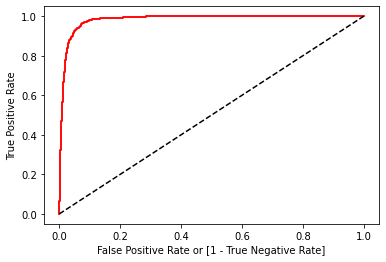

auc accuracy: 0.6562804231857573


In [46]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)